In [1]:
%load_ext autoreload
%autoreload 2

# Optimization
from iqm.benchmarks.optimization.qscore import QScoreConfiguration

# General BenchmarkExperiment
from iqm.benchmarks.benchmark_experiment import BenchmarkExperiment

# Choose (or define) a backend

In [2]:
backend = "IQMFakeAdonis"
#backend = "IQMFakeApollo"
#backend = "garnet"
#backend = "deneb"

#### Set IQM Token if using Resonance.

In [3]:
# import os
# os.environ["IQM_TOKEN"] = ""

# -- Benchmark configuration --

### Q-Score

In [4]:
EXAMPLE_QSCORE = QScoreConfiguration(
    num_instances = 100,
    num_qaoa_layers= 1,
    shots = 20_000,
    calset_id=None, # calibration set ID, default is None
    min_num_nodes =  2,
    max_num_nodes = 5,
    use_virtual_node = True,
    use_classically_optimized_angles = True,
    choose_qubits_routine = "custom",
    custom_qubits_array=[[2],
                    [2, 0],
                    [2, 0, 1],
                    [2, 0, 1, 3],
                    [2, 0, 1, 3, 4]],
    seed = 25
    )

# -- Running the experiment --

In [5]:
benchmark_list = [EXAMPLE_QSCORE]

2024-12-18 15:54:44,190 - iqm.benchmarks.logging_config - INFO - 
Now executing qscore
2024-12-18 15:54:44,197 - iqm.benchmarks.logging_config - INFO - Q-Score = 2 passed with:
Approximation ratio (Beta): 0.6157; Avg MaxCut size: 0.5600
2024-12-18 15:54:45,291 - iqm.benchmarks.logging_config - INFO - Q-Score = 3 passed with:
Approximation ratio (Beta): 0.6266; Avg MaxCut size: 1.3295
2024-12-18 15:54:49,071 - iqm.benchmarks.logging_config - INFO - Q-Score = 4 passed with:
Approximation ratio (Beta): 0.4406; Avg MaxCut size: 2.1273
2024-12-18 15:54:56,415 - iqm.benchmarks.logging_config - INFO - Q-Score = 5 passed with:
Approximation ratio (Beta): 0.3743; Avg MaxCut size: 3.2449


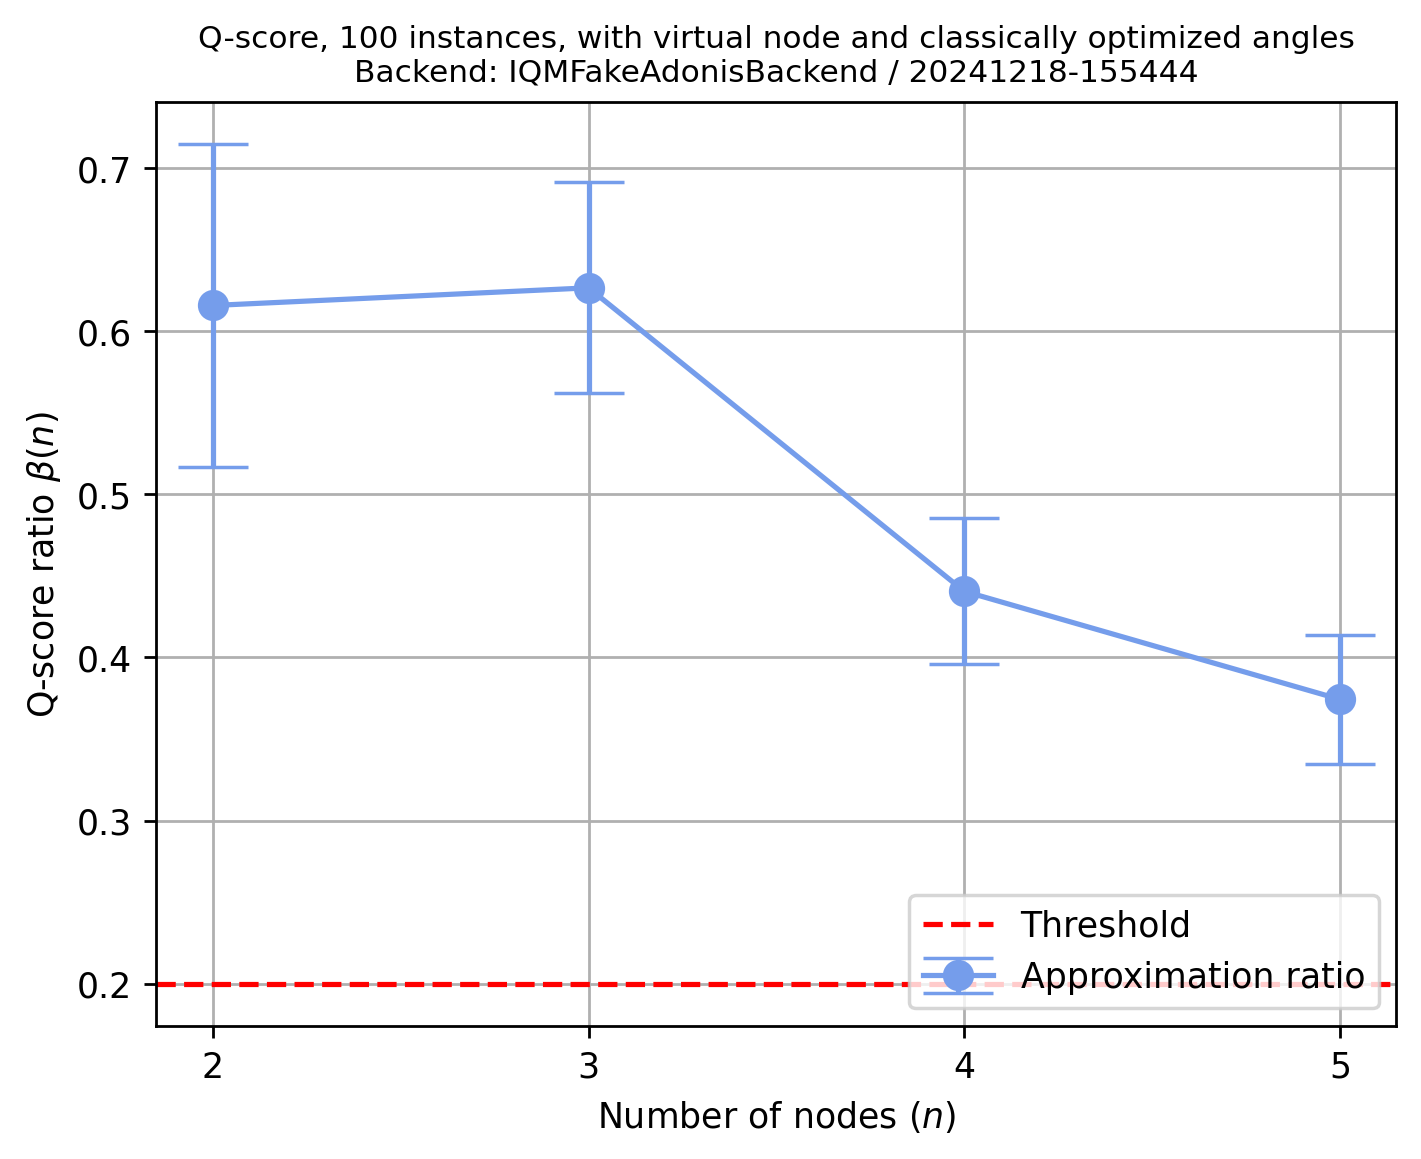

In [6]:
EXAMPLE_EXPERIMENT = BenchmarkExperiment(backend, benchmark_list)
EXAMPLE_EXPERIMENT.run_experiment()

# Check with rebased class

In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
backend = "fakeadonis"
#backend = "fakeapollo"
#backend = "garnet"
#backend = "deneb"

In [9]:
from iqm.benchmarks.optimization.qscore_rebased import *
import random

In [10]:
EXAMPLE_QSCORE = QScoreConfiguration(
    num_instances = 100,
    num_qaoa_layers= 1,
    shots = 20_000,
    calset_id=None, # calibration set ID, default is None
    min_num_nodes =  2,
    max_num_nodes = 5,
    use_virtual_node = True,
    use_classically_optimized_angles = True,
    choose_qubits_routine = "custom",
    custom_qubits_array=[
                    [2, 0],
                    [2, 0, 1],
                    [2, 0, 1, 3],
                    [2, 0, 1, 3, 4]],
    seed = 25
    )

In [11]:
benchmark_qscore = QScoreBenchmark(backend, EXAMPLE_QSCORE)
run0_qscore = benchmark_qscore.run()

2024-12-18 15:54:57,102 - iqm.benchmarks.logging_config - INFO - Executing on 100 random graphs with 2 nodes.
2024-12-18 15:54:57,102 - iqm.benchmarks.logging_config - INFO - Executing graph 0 with 2 nodes.
2024-12-18 15:54:57,103 - iqm.benchmarks.logging_config - INFO - This graph instance has no edges.
2024-12-18 15:54:57,103 - iqm.benchmarks.logging_config - INFO - Solved the MaxCut on graph 1/100.
2024-12-18 15:54:57,104 - iqm.benchmarks.logging_config - INFO - Executing graph 1 with 2 nodes.
2024-12-18 15:54:57,105 - iqm.benchmarks.logging_config - INFO - Graph 2/100 had no edges: cut size = 0.
2024-12-18 15:54:57,105 - iqm.benchmarks.logging_config - INFO - This graph instance has no edges.
2024-12-18 15:54:57,106 - iqm.benchmarks.logging_config - INFO - Solved the MaxCut on graph 2/100.
2024-12-18 15:54:57,106 - iqm.benchmarks.logging_config - INFO - Executing graph 2 with 2 nodes.
2024-12-18 15:54:57,106 - iqm.benchmarks.logging_config - INFO - Graph 3/100 had no edges: cut siz

In [12]:
attr_keys = sorted([str(x) for x in list(run0_qscore.dataset.attrs.keys())])
for k in attr_keys:
    print(k)

2
3
4
5
backend_configuration_name
backend_name
benchmark
calset_id
choose_qubits_routine
custom_qubits_array
execution_timestamp
max_gates_per_batch
max_num_nodes
min_num_nodes
min_num_qubits
num_instances
num_qaoa_layers
optimize_sqg
physical_layout
qiskit_optim_level
routing_method
seed
session_timestamp
shots
transpiled_circuits
untranspiled_circuits
use_classically_optimized_angles
use_virtual_node


2024-12-18 15:55:14,173 - iqm.benchmarks.logging_config - INFO - Q-Score = 2 passed with:
Approximation ratio (Beta): 0.6157; Avg MaxCut size: 0.5600
2024-12-18 15:55:14,817 - iqm.benchmarks.logging_config - INFO - Q-Score = 3 passed with:
Approximation ratio (Beta): 0.6542; Avg MaxCut size: 1.3551
2024-12-18 15:55:15,867 - iqm.benchmarks.logging_config - INFO - Q-Score = 4 passed with:
Approximation ratio (Beta): 0.3936; Avg MaxCut size: 2.0605
2024-12-18 15:55:17,089 - iqm.benchmarks.logging_config - INFO - Q-Score = 5 passed with:
Approximation ratio (Beta): 0.2103; Avg MaxCut size: 2.9184


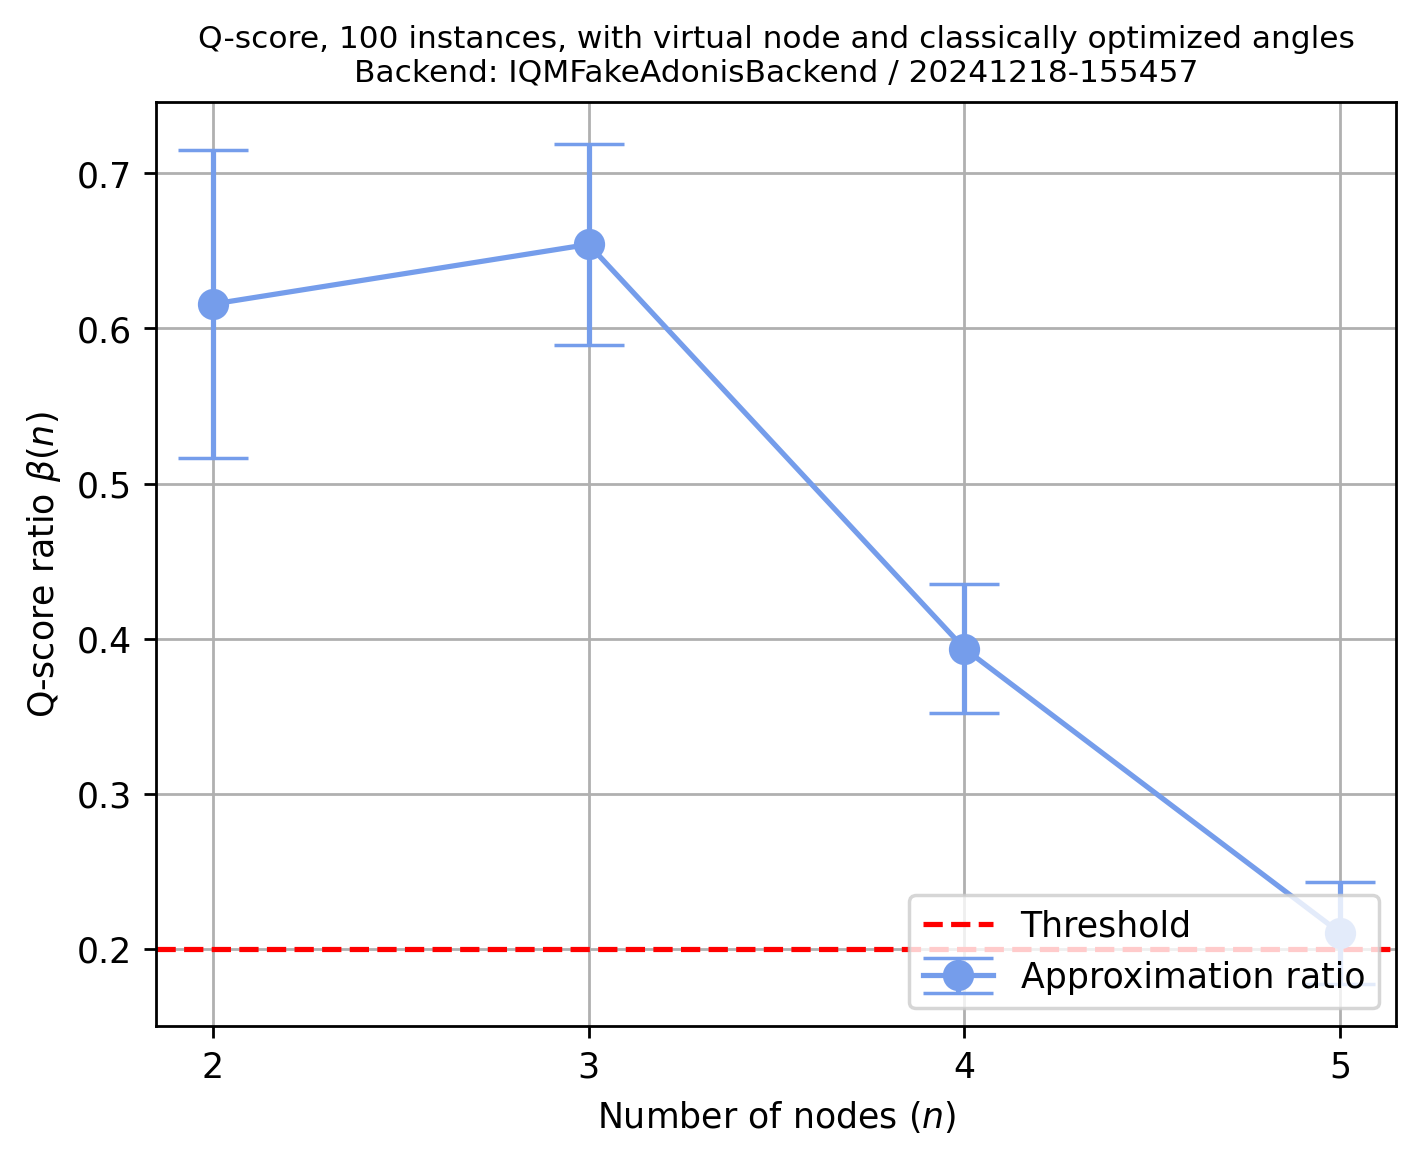

In [13]:
result0_qscore = benchmark_qscore.analyze()